## Импорт необходимых зависимостей

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchinfo import summary
import torchvision
import torchvision.transforms as transforms
import gc
import matplotlib.pyplot as plt
import numpy as np

## Скачивание и подготовка данных базы MNIST

In [2]:
transform = transforms.Compose([transforms.Resize((32,32)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,)),])

mnist_training_data = torchvision.datasets.MNIST(root='./datasets/mnist/', train=True, download=True, transform=transform)
mnist_test_data = torchvision.datasets.MNIST(root='./datasets/mnist/', train=False, download=True, transform=transform)
mnist_training_data, mnist_test_data


100%|██████████| 9912422/9912422 [00:00<00:00, 149186927.19it/s]


Extracting ./datasets/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 49182173.70it/s]

Extracting ./datasets/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/mnist/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 39199067.03it/s]


Extracting ./datasets/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7369643.62it/s]


Extracting ./datasets/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/mnist/MNIST/raw



(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./datasets/mnist/
     Split: Train
     StandardTransform
 Transform: Compose(
                Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
                Normalize(mean=(0.1307,), std=(0.3081,))
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./datasets/mnist/
     Split: Test
     StandardTransform
 Transform: Compose(
                Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
                Normalize(mean=(0.1307,), std=(0.3081,))
            ))

## Скачивание и подготовка данных базы CIFAR-10

In [3]:
cifar10_transform_train = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(p=0.7),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
cifar10_transform_test = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

cifar10_training_data = torchvision.datasets.CIFAR10(root='./datasets/CIFAR10/', train=True, download=True, transform=cifar10_transform_train)
cifar10_test_data = torchvision.datasets.CIFAR10(root='./datasets/CIFAR10/', train=False, download=True, transform=cifar10_transform_test)
cifar10_training_data, cifar10_test_data

100%|██████████| 170498071/170498071 [00:04<00:00, 34750191.04it/s]


Extracting ./datasets/CIFAR10/cifar-10-python.tar.gz to ./datasets/CIFAR10/
Files already downloaded and verified


(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: ./datasets/CIFAR10/
     Split: Train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.7)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: ./datasets/CIFAR10/
     Split: Test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ))

## Отрисовка цифры MNIST

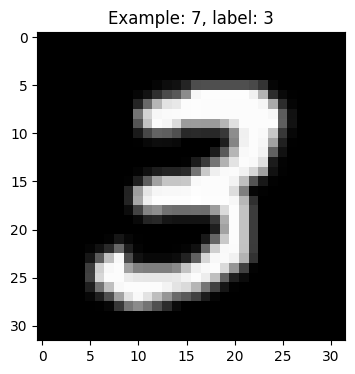

In [4]:
def draw_mnist_digit(data, example):
    plt.figure(figsize=(4, 4))
    img, label = data[example]
    plt.title('Example: %d, label: %d' % (example, label))
    plt.imshow(img.permute(1, 2, 0), cmap='gray')

draw_mnist_digit(mnist_training_data, example=7)

## Отрисовка изображений CIFAR-10

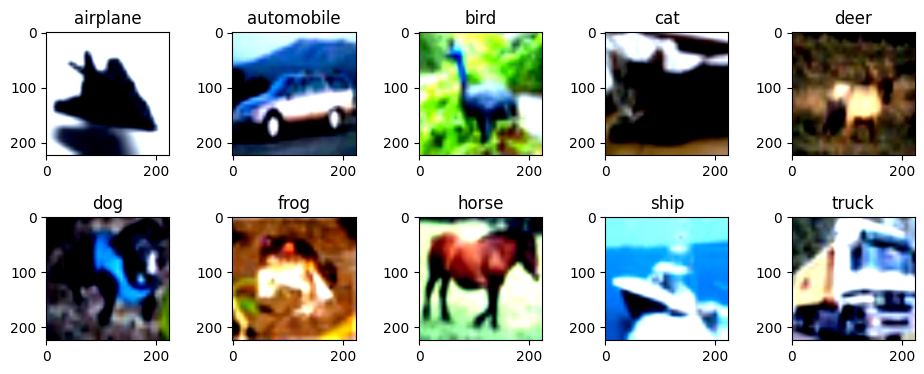

In [5]:
classes = cifar10_training_data.classes

def draw_cifar10_classes(data):
    class_images = {cls: [] for cls in classes}
    for img, label in data:
        class_images[classes[label]].append(img)
        if all(len(class_images[cls]) > 0 for cls in classes):
            break
    fig, axs = plt.subplots(2, 5, figsize=(12, 4))
    fig.subplots_adjust(hspace=0.5, wspace=0.01)
    axs = axs.ravel()
    for i, cls in enumerate(classes):
        axs[i].set_title(cls)
        img = class_images[cls][0] / 2 + 0.5
        npimg = img.numpy()
        npimg = np.clip(npimg, 0, 1)
        axs[i].imshow(np.transpose(npimg, (1, 2, 0)))

draw_cifar10_classes(cifar10_training_data)

## Скачивание и подготовка данных базы CIFAR-100

In [6]:
cifar100_transform_train = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(p=0.7),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
cifar100_transform_test = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

cifar100_training_data = torchvision.datasets.CIFAR100(root='./datasets/CIFAR100/', train=True, download=True, transform=cifar100_transform_train)
cifar100_test_data = torchvision.datasets.CIFAR100(root='./datasets/CIFAR100/', train=False, download=True, transform=cifar100_transform_test)
cifar100_training_data, cifar100_test_data

100%|██████████| 169001437/169001437 [00:04<00:00, 34674249.95it/s]


Extracting ./datasets/CIFAR100/cifar-100-python.tar.gz to ./datasets/CIFAR100/
Files already downloaded and verified


(Dataset CIFAR100
     Number of datapoints: 50000
     Root location: ./datasets/CIFAR100/
     Split: Train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.7)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 Dataset CIFAR100
     Number of datapoints: 10000
     Root location: ./datasets/CIFAR100/
     Split: Test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ))

## Отрисовка изображений CIFAR-100

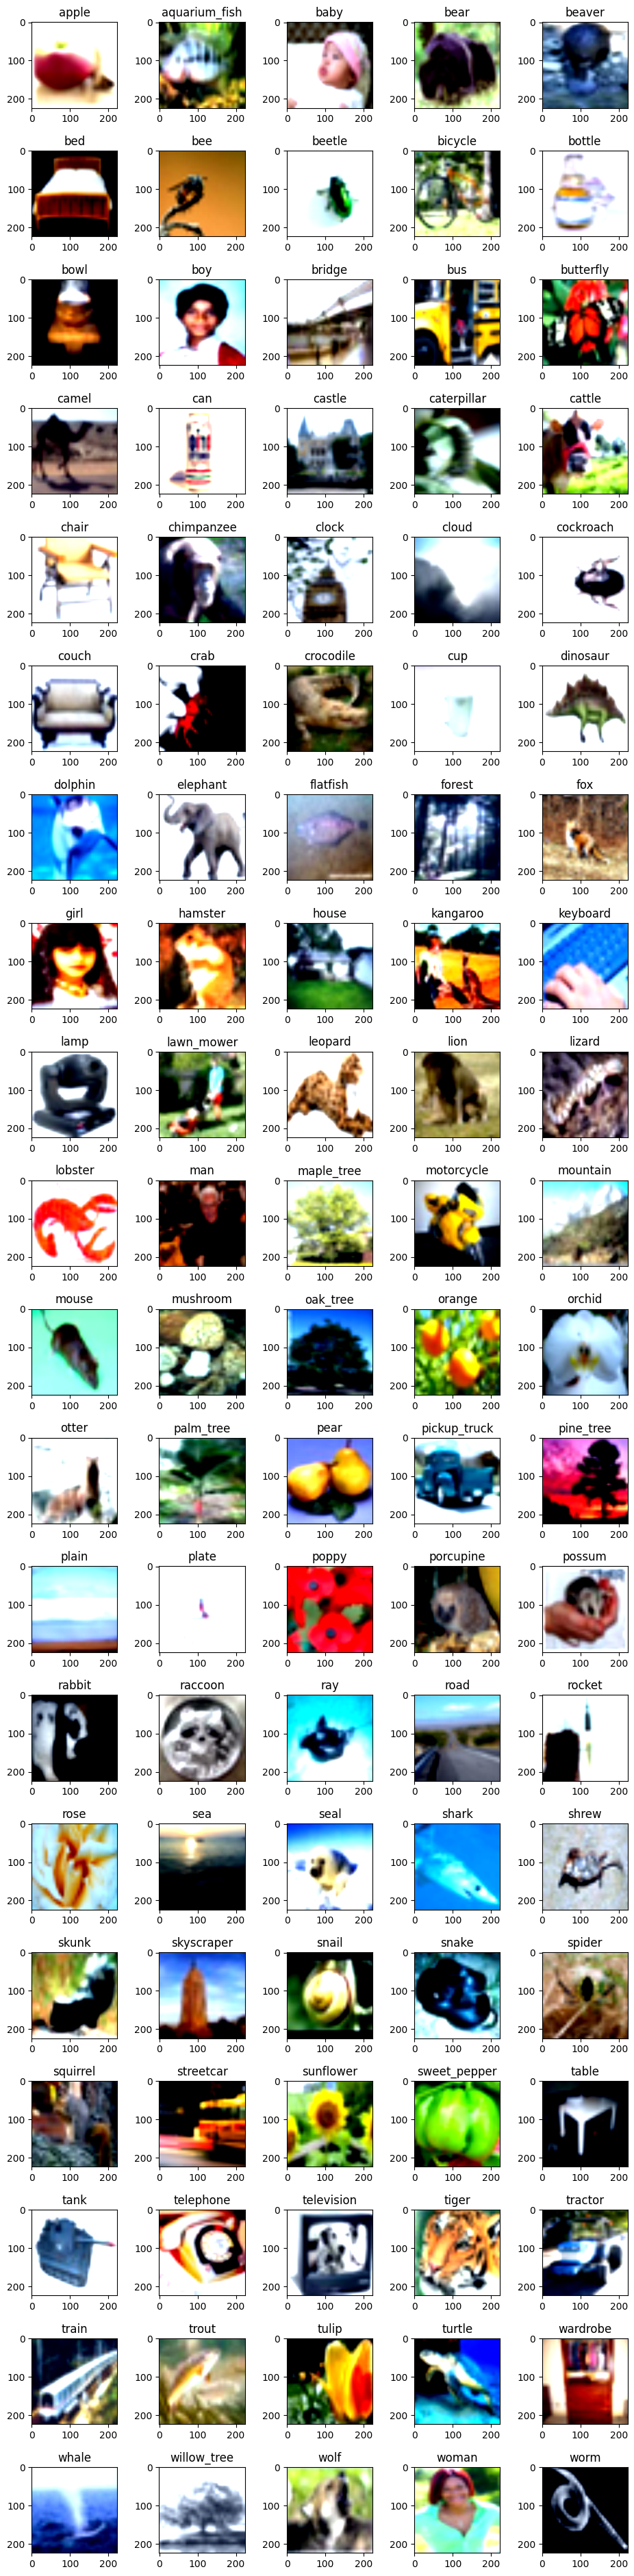

In [7]:
classes = cifar100_training_data.classes

def draw_cifar100_classes(data):
    class_images = {cls: [] for cls in classes}
    for img, label in data:
        class_images[classes[label]].append(img)
        if all(len(class_images[cls]) > 0 for cls in classes):
            break
    fig, axs = plt.subplots(20, 5, figsize=(12, 48))
    fig.subplots_adjust(hspace=0.5, wspace=0.01)
    axs = axs.ravel()
    for i, cls in enumerate(classes):
        axs[i].set_title(cls)
        img = class_images[cls][0] / 2 + 0.5
        npimg = img.numpy()
        npimg = np.clip(npimg, 0, 1)
        axs[i].imshow(np.transpose(npimg, (1, 2, 0)))

draw_cifar100_classes(cifar100_training_data)

## Загружаем подготовленные данные в пакеты

In [8]:
mnist_training_data_loader = torch.utils.data.DataLoader(mnist_training_data, batch_size=64, shuffle=True)
mnist_test_data_loader = torch.utils.data.DataLoader(mnist_test_data, batch_size=64, shuffle=True)

In [9]:
cifar10_training_data_loader = torch.utils.data.DataLoader(cifar10_training_data, batch_size=64, shuffle=True)
cifar10_test_data_loader = torch.utils.data.DataLoader(cifar10_test_data, batch_size=64, shuffle=True)

In [10]:
cifar100_training_data_loader = torch.utils.data.DataLoader(cifar100_training_data, batch_size=64, shuffle=True)
cifar100_test_data_loader = torch.utils.data.DataLoader(cifar100_test_data, batch_size=64, shuffle=True)

## Архитектура LeNet-5

In [11]:
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=400, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        output = self.pool1(F.relu(self.conv1(x)))
        output = self.pool2(F.relu(self.conv2(output)))
        output = output.view(-1, 16 * 5 * 5)
        output = F.relu(self.fc1(output))
        output = F.relu(self.fc2(output))
        output = self.fc3(output)
        return output

    def __str__(self):
        return 'LeNet'

## Архитектура VGG16

In [12]:
class VGG16(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        self.conv1_bn = nn.BatchNorm2d(num_features=64)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.conv2_bn = nn.BatchNorm2d(num_features=64)
        self.max_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv3_bn = nn.BatchNorm2d(num_features=128)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.conv4_bn = nn.BatchNorm2d(num_features=128)
        self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.conv5_bn = nn.BatchNorm2d(num_features=256)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.conv6_bn = nn.BatchNorm2d(num_features=256)
        self.conv7 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.conv7_bn = nn.BatchNorm2d(num_features=256)
        self.max_pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv8 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
        self.conv8_bn = nn.BatchNorm2d(num_features=512)
        self.conv9 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv9_bn = nn.BatchNorm2d(num_features=512)
        self.conv10 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv10_bn = nn.BatchNorm2d(num_features=512)
        self.max_pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv11 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv11_bn = nn.BatchNorm2d(num_features=512)
        self.conv12 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv12_bn = nn.BatchNorm2d(num_features=512)
        self.conv13 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv13_bn = nn.BatchNorm2d(num_features=512)
        self.max_pool5 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(7 * 7 * 512, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 10)

    def forward(self, x):
        output = F.relu(self.conv1_bn(self.conv1(x)))
        output = F.relu(self.conv2_bn(self.conv2(output)))
        output = self.max_pool1(output)
        output = F.relu(self.conv3_bn(self.conv3(output)))
        output = F.relu(self.conv4_bn(self.conv4(output)))
        output = self.max_pool2(output)
        output = F.relu(self.conv5_bn(self.conv5(output)))
        output = F.relu(self.conv6_bn(self.conv6(output)))
        output = F.relu(self.conv7_bn(self.conv7(output)))
        output = self.max_pool3(output)
        output = F.relu(self.conv8_bn(self.conv8(output)))
        output = F.relu(self.conv9_bn(self.conv9(output)))
        output = F.relu(self.conv10_bn(self.conv10(output)))
        output = self.max_pool4(output)
        output = F.relu(self.conv11_bn(self.conv11(output)))
        output = F.relu(self.conv12_bn(self.conv12(output)))
        output = F.relu(self.conv13_bn(self.conv13(output)))
        output = self.max_pool5(output)
        output = output.view(-1, 7 * 7 * 512)
        output = F.relu(self.fc1(output))
        output = F.dropout(output, 0.2)
        output = F.relu(self.fc2(output))
        output = F.dropout(output, 0.2)
        output = self.fc3(output)
        return output

    def __str__(self):
        return 'VGG16'

## Архитектура ResNet

In [13]:
class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=in_planes, out_channels=planes, kernel_size=3, stride=stride, padding=1)
        self.conv1_bn = nn.BatchNorm2d(num_features=planes)
        self.conv2 = nn.Conv2d(in_channels=planes, out_channels=planes, kernel_size=3, stride=1, padding=1)
        self.conv2_bn = nn.BatchNorm2d(num_features=planes)

        self.shortcut = None
        if stride != 1 or in_planes != planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels=in_planes, out_channels=planes, kernel_size=1, stride=stride),
                nn.BatchNorm2d(num_features=planes)
            )

    def forward(self, x):
        residual = x
        output = F.relu(self.conv1_bn(self.conv1(x)))
        output = self.conv2_bn(self.conv2(output))
        output += self.shortcut(x) if self.shortcut else residual
        output = F.relu(output)
        return output

class ResNet(nn.Module):
    def __init__(self, block, num_blocks):
        super().__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=7, stride=2, padding=3)
        self.conv1_bn = nn.BatchNorm2d(num_features=64)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self.__make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self.__make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self.__make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self.__make_layer(block, 512, num_blocks[3], stride=2)
        self.avgpool = nn.AvgPool2d(kernel_size=7, stride=1)
        self.fc = nn.Linear(in_features=512, out_features=100)

    def __make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = [block(self.in_planes, planes, stride)]
        self.in_planes = planes
        for stridee in strides[1:]:
            layers.append(block(self.in_planes, planes))
        return nn.Sequential(*layers)

    def forward(self, x):
        output = F.relu(self.conv1_bn(self.conv1(x)))
        output = self.maxpool(output)
        output = self.layer1(output)
        output = self.layer2(output)
        output = self.layer3(output)
        output = self.layer4(output)
        output = self.avgpool(output)
        output = output.view(output.size(0), -1)
        output = self.fc(output)
        return output

    def __str__(self):
        return 'ResNet'

## Сводка по построенным моделям

In [14]:
lenet = LeNet()
summary(model=lenet, input_size=(1, 1, 32, 32), col_width=20)

Layer (type:depth-idx)                   Output Shape         Param #
LeNet                                    [1, 10]              --
├─Conv2d: 1-1                            [1, 6, 28, 28]       156
├─AvgPool2d: 1-2                         [1, 6, 14, 14]       --
├─Conv2d: 1-3                            [1, 16, 10, 10]      2,416
├─AvgPool2d: 1-4                         [1, 16, 5, 5]        --
├─Linear: 1-5                            [1, 120]             48,120
├─Linear: 1-6                            [1, 84]              10,164
├─Linear: 1-7                            [1, 10]              850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
Total mult-adds (M): 0.42
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.25
Estimated Total Size (MB): 0.30

In [15]:
vgg16 = VGG16()
summary(model=vgg16, input_size=(1, 3, 224, 224), col_width=20)

Layer (type:depth-idx)                   Output Shape         Param #
VGG16                                    [1, 10]              --
├─Conv2d: 1-1                            [1, 64, 224, 224]    1,792
├─BatchNorm2d: 1-2                       [1, 64, 224, 224]    128
├─Conv2d: 1-3                            [1, 64, 224, 224]    36,928
├─BatchNorm2d: 1-4                       [1, 64, 224, 224]    128
├─MaxPool2d: 1-5                         [1, 64, 112, 112]    --
├─Conv2d: 1-6                            [1, 128, 112, 112]   73,856
├─BatchNorm2d: 1-7                       [1, 128, 112, 112]   256
├─Conv2d: 1-8                            [1, 128, 112, 112]   147,584
├─BatchNorm2d: 1-9                       [1, 128, 112, 112]   256
├─MaxPool2d: 1-10                        [1, 128, 56, 56]     --
├─Conv2d: 1-11                           [1, 256, 56, 56]     295,168
├─BatchNorm2d: 1-12                      [1, 256, 56, 56]     512
├─Conv2d: 1-13                           [1, 256, 56, 56]  

In [16]:
resnet = ResNet(BasicBlock, [3, 4, 6, 3])
summary(model=resnet, input_size=(1, 3, 224, 224), col_width=20)

Layer (type:depth-idx)                   Output Shape         Param #
ResNet                                   [1, 100]             --
├─Conv2d: 1-1                            [1, 64, 112, 112]    9,472
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]    128
├─MaxPool2d: 1-3                         [1, 64, 56, 56]      --
├─Sequential: 1-4                        [1, 64, 56, 56]      --
│    └─BasicBlock: 2-1                   [1, 64, 56, 56]      --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]      36,928
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]      128
│    │    └─Conv2d: 3-3                  [1, 64, 56, 56]      36,928
│    │    └─BatchNorm2d: 3-4             [1, 64, 56, 56]      128
│    └─BasicBlock: 2-2                   [1, 64, 56, 56]      --
│    │    └─Conv2d: 3-5                  [1, 64, 56, 56]      36,928
│    │    └─BatchNorm2d: 3-6             [1, 64, 56, 56]      128
│    │    └─Conv2d: 3-7                  [1, 64, 56, 56]      36,9

## Обучение построенных моделей

### Использование оптимизаторов SGD, Adadelta, NAG, Adam
В качестве loss-функции использована категориальная перекрёстная энтропия

In [17]:
lr = 0.01
epochs = 30

models = (
    LeNet,
    VGG16,
    ResNet,
)

training_data_loader = {
    'LeNet': mnist_training_data_loader,
    'VGG16': cifar10_training_data_loader,
    'ResNet': cifar100_training_data_loader
}

test_data_loader = {
    'LeNet': mnist_test_data_loader,
    'VGG16': cifar10_test_data_loader,
    'ResNet': cifar100_test_data_loader
}

loss_func = nn.CrossEntropyLoss()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def train_and_evaluate(model, optimizer, optimizer_name):
    model = model.to(device)
    print(f'optimizer: {optimizer_name}')
    loss_values = []
    for epoch in range(1, epochs + 1):
        running_loss = 0
        for i, (inputs, labels) in enumerate(training_data_loader[str(model)]):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = loss_func(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            del inputs, labels, outputs
            torch.cuda.empty_cache()
            gc.collect()
        loss_values.append(running_loss / len(training_data_loader[str(model)]))
        print(f'Epoch {epoch}, loss: {running_loss / len(training_data_loader[str(model)])}')

    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, labels in test_data_loader[str(model)]:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del inputs, labels, outputs

        print('Accuracy: {} %'.format(100 * correct / total))
    return loss_values

def get_models_and_optimizers(model):
    model_parameters = []
    if model.__name__ == 'ResNet':
        model_parameters = [BasicBlock] + [[3, 4, 6, 3]]
    models = {
        'SGD': model(*model_parameters),
        'Adadelta': model(*model_parameters),
        'NAG': model(*model_parameters),
        'Adam': model(*model_parameters),
    }
    optimizers = {
        'SGD': optim.SGD(models['SGD'].parameters(), weight_decay=0.0001, lr=lr),
        'Adadelta': optim.Adadelta(models['Adadelta'].parameters(), lr=lr),
        'NAG': optim.SGD(models['NAG'].parameters(), lr=lr, momentum=0.9, nesterov=True),
        'Adam': optim.Adam(models['Adam'].parameters(), lr=lr, betas=(0.9, 0.999)),
    }
    return models, optimizers

def train_model(model, optimizer_data):
    optimizer_name, optimizer = optimizer_data
    return train_and_evaluate(model, optimizer, optimizer_name)

def plot_data(model, optimizers, y_s):
    plt.title(model.__name__)
    for i, optimizer_data in enumerate(optimizers.items()):
        optimizer_name, optimizer = optimizer_data
        x, y = range(1, epochs + 1), y_s[i]
        plt.plot(x, y, label=optimizer_name)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()


In [ ]:
loss_values = list()
models, optimizers = get_models_and_optimizers(LeNet)

In [ ]:
loss_values.append(train_model(models['SGD'], ('SGD', optimizers['SGD'])))

optimizer: SGD
Epoch 1, loss: 2.240983573612628
Epoch 2, loss: 0.44975666659695507
Epoch 3, loss: 0.23710161765048435
Epoch 4, loss: 0.17210766165924352
Epoch 5, loss: 0.1376343284284811
Epoch 6, loss: 0.11389673736069535
Epoch 7, loss: 0.09967437727368876
Epoch 8, loss: 0.08824380498770665
Epoch 9, loss: 0.07842120158720388
Epoch 10, loss: 0.07166922944975194
Accuracy: 97.3 %


In [ ]:
loss_values.append(train_model(models['Adadelta'], ('Adadelta', optimizers['Adadelta'])))

optimizer: Adadelta
Epoch 1, loss: 1.5170144292273755
Epoch 2, loss: 0.49013963217801376
Epoch 3, loss: 0.3939893825698509
Epoch 4, loss: 0.3431914864239027
Epoch 5, loss: 0.306854925199803
Epoch 6, loss: 0.27829765406911816
Epoch 7, loss: 0.254284954592109
Epoch 8, loss: 0.23410734749917408
Epoch 9, loss: 0.21532993624284705
Epoch 10, loss: 0.20019553693484016
Accuracy: 94.65 %


In [ ]:
loss_values.append(train_model(models['NAG'], ('NAG', optimizers['NAG'])))

optimizer: NAG
Epoch 1, loss: 0.4371953848918189
Epoch 2, loss: 0.08103794677541462
Epoch 3, loss: 0.05588932117178683
Epoch 4, loss: 0.04202004938394076
Epoch 5, loss: 0.03409383941376244
Epoch 6, loss: 0.027501314677374274
Epoch 7, loss: 0.024200251851354226
Epoch 8, loss: 0.02117360056440499
Epoch 9, loss: 0.017707837733144036
Epoch 10, loss: 0.015451677477852819
Accuracy: 99.11 %


In [ ]:
loss_values.append(train_model(models['Adam'], ('Adam', optimizers['Adam'])))

optimizer: Adam
Epoch 1, loss: 0.16846107707660732
Epoch 2, loss: 0.07991913931218655
Epoch 3, loss: 0.07163513046436767
Epoch 4, loss: 0.06325767442902008
Epoch 5, loss: 0.057831785701358024
Epoch 6, loss: 0.053692195672589954
Epoch 7, loss: 0.05894179558499808
Epoch 8, loss: 0.05192605062909949
Epoch 9, loss: 0.04686979512121458
Epoch 10, loss: 0.047811153087331866
Accuracy: 98.36 %


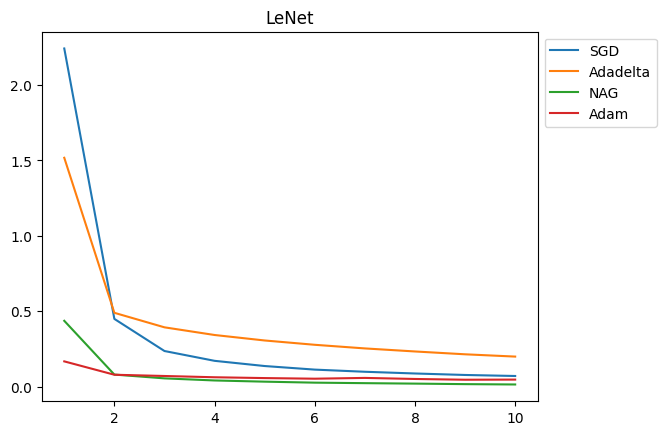

In [ ]:
plot_data(LeNet, optimizers, loss_values)

In [52]:
loss_values = list()
models, optimizers = get_models_and_optimizers(VGG16)

In [ ]:
loss_values.append(train_model(models['SGD'], ('SGD', optimizers['SGD'])))

optimizer: SGD
Epoch 1, loss: 1.341444855532073
Epoch 2, loss: 0.8445090707153311
Epoch 3, loss: 0.6458588222332318
Epoch 4, loss: 0.5338959336433264
Epoch 5, loss: 0.4526114424743006
Epoch 6, loss: 0.38745697485783215
Epoch 7, loss: 0.3343077725480737
Epoch 8, loss: 0.2902111218923041
Epoch 9, loss: 0.25203089142585045
Epoch 10, loss: 0.2169502394421555
Accuracy: 84.38 %


In [ ]:
loss_values.append(train_model(models['Adadelta'], ('Adadelta', optimizers['Adadelta'])))

optimizer: Adadelta
Epoch 1, loss: 1.3352391081088035
Epoch 2, loss: 0.856926270191322
Epoch 3, loss: 0.6650632657587071
Epoch 4, loss: 0.5512594807216579
Epoch 5, loss: 0.46433949596284296
Epoch 6, loss: 0.4014037060729988
Epoch 7, loss: 0.34313723380151
Epoch 8, loss: 0.29735308504470476
Epoch 9, loss: 0.2571313516677493
Epoch 10, loss: 0.21924707582672995
Accuracy: 84.2 %


In [ ]:
loss_values.append(train_model(models['NAG'], ('NAG', optimizers['NAG'])))

optimizer: NAG
Epoch 1, loss: 1.3067385601570538
Epoch 2, loss: 0.8088863817474726
Epoch 3, loss: 0.6294644128178697
Epoch 4, loss: 0.5259707802358795
Epoch 5, loss: 0.4516903279763658
Epoch 6, loss: 0.3920461676938607
Epoch 7, loss: 0.34089707949048725
Epoch 8, loss: 0.30123863649337795
Epoch 9, loss: 0.26065441136203155
Epoch 10, loss: 0.23634705335482994
Accuracy: 85.44 %


In [ ]:
loss_values.append(train_model(models['Adam'], ('Adam', optimizers['Adam'])))

optimizer: Adam
Epoch 1, loss: 14.75276993211273
Epoch 2, loss: 2.2261673861452382
Epoch 3, loss: 2.213835247947127
Epoch 4, loss: 2.243641160028365
Epoch 5, loss: 2.2923589841179224
Epoch 6, loss: 2.303636540537295
Epoch 7, loss: 2.303647857797725
Epoch 8, loss: 2.3037781803809163
Epoch 9, loss: 2.3037522531226466
Epoch 10, loss: 2.303500205049734
Accuracy: 10.0 %


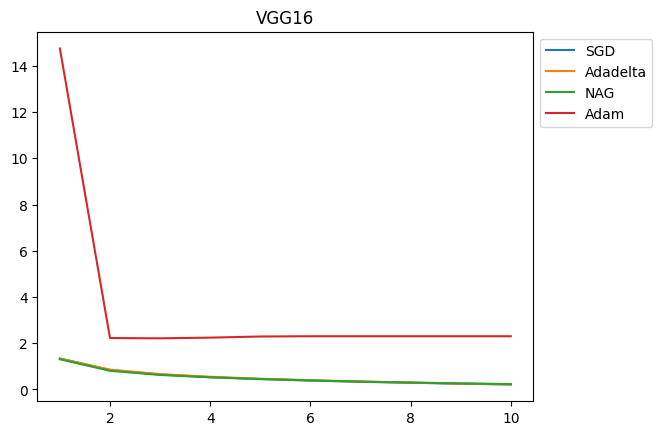

In [ ]:
plot_data(VGG16, optimizers, loss_values)

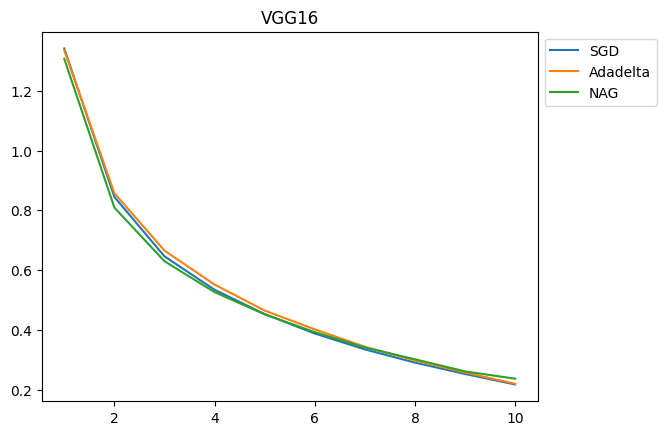

In [ ]:
plot_data(VGG16, dict(list(optimizers.items())[:-1]), loss_values[:-1])

In [18]:
loss_values = list()
models, optimizers = get_models_and_optimizers(ResNet)

In [19]:
loss_values.append(train_model(models['SGD'], ('SGD', optimizers['SGD'])))

optimizer: SGD
Epoch 1, loss: 3.7088081681210063
Epoch 2, loss: 2.9426050497137983
Epoch 3, loss: 2.4289712815943276
Epoch 4, loss: 2.034357941211642
Epoch 5, loss: 1.7477547101047644
Epoch 6, loss: 1.5273629548909413
Epoch 7, loss: 1.3441362925197766
Epoch 8, loss: 1.185628365982524
Epoch 9, loss: 1.0364771672831776
Epoch 10, loss: 0.9047897692074252
Epoch 11, loss: 0.7829982053364635
Epoch 12, loss: 0.6747069589774627
Epoch 13, loss: 0.579049547653064
Epoch 14, loss: 0.4794686895121089
Epoch 15, loss: 0.40801206065337065
Epoch 16, loss: 0.3505564139932013
Epoch 17, loss: 0.29175484163300763
Epoch 18, loss: 0.23522249828366673
Epoch 19, loss: 0.2048160731840088
Epoch 20, loss: 0.16904509489131553
Epoch 21, loss: 0.1368893552476259
Epoch 22, loss: 0.12166105654290722
Epoch 23, loss: 0.09714954759082411
Epoch 24, loss: 0.08545389436328274
Epoch 25, loss: 0.06476167770569473
Epoch 26, loss: 0.047528338110041056
Epoch 27, loss: 0.039164026597719594
Epoch 28, loss: 0.030133492712888992
Epo

In [59]:
loss_values.append(train_model(models['Adadelta'], ('Adadelta', optimizers['Adadelta'])))

optimizer: Adadelta
Epoch 1, loss: 3.793581087570971
Epoch 2, loss: 3.1285041997499783
Epoch 3, loss: 2.7362281378272852
Epoch 4, loss: 2.4088089107857336
Epoch 5, loss: 2.1415576023214005
Epoch 6, loss: 1.9232381736226094
Epoch 7, loss: 1.7316278072879137
Epoch 8, loss: 1.5584662994155494
Epoch 9, loss: 1.4068960945319642
Epoch 10, loss: 1.2618045732188408
Epoch 11, loss: 1.134847595258747
Epoch 12, loss: 1.0105035106849183
Epoch 13, loss: 0.881373288762539
Epoch 14, loss: 0.7715930761888509
Epoch 15, loss: 0.6667921279016358
Epoch 16, loss: 0.5755298085834669
Epoch 17, loss: 0.4876775643824007
Epoch 18, loss: 0.42189537830974744
Epoch 19, loss: 0.3612241648004183
Epoch 20, loss: 0.3155974637421653
Epoch 21, loss: 0.27762731081803743
Epoch 22, loss: 0.24294940031626644
Epoch 23, loss: 0.2083883385657502
Epoch 24, loss: 0.1900717984799229
Epoch 25, loss: 0.16659409731931393
Epoch 26, loss: 0.15214520145941268
Epoch 27, loss: 0.1339609563145834
Epoch 28, loss: 0.12235676433862475
Epoch 

In [29]:
loss_values.append(train_model(models['NAG'], ('NAG', optimizers['NAG'])))

optimizer: NAG
Epoch 1, loss: 3.7237366184859018
Epoch 2, loss: 2.8165820654091016
Epoch 3, loss: 2.205968288509437
Epoch 4, loss: 1.832055975104232
Epoch 5, loss: 1.5684322938894677
Epoch 6, loss: 1.3626123383984237
Epoch 7, loss: 1.1915097927955716
Epoch 8, loss: 1.0391977355455804
Epoch 9, loss: 0.9065008797227879
Epoch 10, loss: 0.7800826562182678
Epoch 11, loss: 0.6618971559397705
Epoch 12, loss: 0.5668682102733256
Epoch 13, loss: 0.4774368453742293
Epoch 14, loss: 0.4076034788356718
Epoch 15, loss: 0.34015956909760187
Epoch 16, loss: 0.27542074802129163
Epoch 17, loss: 0.22820130179700493
Epoch 18, loss: 0.1944352353939696
Epoch 19, loss: 0.16187155383693821
Epoch 20, loss: 0.13651943725802937
Epoch 21, loss: 0.12154583549341354
Epoch 22, loss: 0.10704173234617695
Epoch 23, loss: 0.08289362071201091
Epoch 24, loss: 0.07555236028747923
Epoch 25, loss: 0.06580251209673656
Epoch 26, loss: 0.05725269446320965
Epoch 27, loss: 0.043161939028674344
Epoch 28, loss: 0.038541529175784926
E

In [19]:
loss_values.append(train_model(models['Adam'], ('Adam', optimizers['Adam'])))

optimizer: Adam
Epoch 1, loss: 4.264607585604538
Epoch 2, loss: 3.5646895962907834
Epoch 3, loss: 2.9513987607663243
Epoch 4, loss: 2.420148405120196
Epoch 5, loss: 2.0174249898442222
Epoch 6, loss: 1.7159485941957635
Epoch 7, loss: 1.4571699657860924
Epoch 8, loss: 1.2291245151053913
Epoch 9, loss: 1.0160864197156008
Epoch 10, loss: 0.8320508336319643
Epoch 11, loss: 0.6656202807679505
Epoch 12, loss: 0.5355411593414023
Epoch 13, loss: 0.43943963371350636
Epoch 14, loss: 0.3621377830805681
Epoch 15, loss: 0.30580320041579057
Epoch 16, loss: 0.2685669462584778
Epoch 17, loss: 0.2540287312853824
Epoch 18, loss: 0.21394704126983957
Epoch 19, loss: 0.2047050415926501
Epoch 20, loss: 0.1906827202023905
Epoch 21, loss: 0.17464421199791877
Epoch 22, loss: 0.16793052194987798
Epoch 23, loss: 0.15236919102928295
Epoch 24, loss: 0.15018532705633802
Epoch 25, loss: 0.1437871497114906
Epoch 26, loss: 0.13702140733018478
Epoch 27, loss: 0.1256452222030772
Epoch 28, loss: 0.13073364086449146
Epoch 

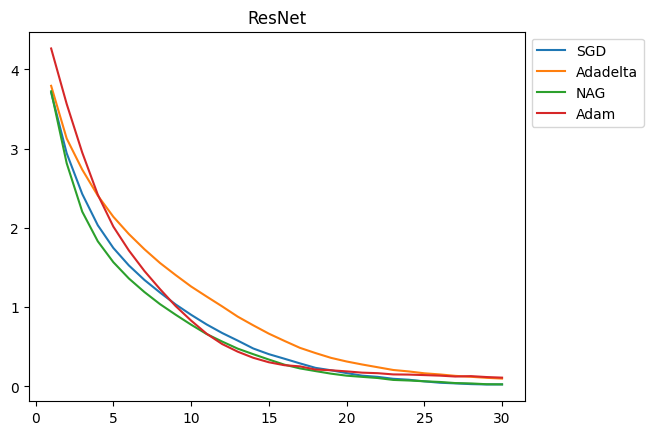

In [28]:
plot_data(ResNet, optimizers, loss_values)